#  Prediction using Supervised ML 
## Dataset link: http://bit.ly/w-data
_The dataset invloves two variables Hours and Scores_

## Problem Statement:
_Predict the precentage of the student based on number of study hours_

In [ ]:
## Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
## Reading the dataset
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
## No. of Rows and Columns
df.shape

(25, 2)

### Basic EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
## Finding out the Mean, Median and Quartile Range
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
## Interquartile Range:- 75%(Q3) - 25%(Q1)
print("Hours: ", 7.4 - 2.7)
print("Scores: ", 75 - 30)

Hours:  4.7
Scores:  45


In [ ]:
## Checking the duplicate values
df.duplicated().sum()

0

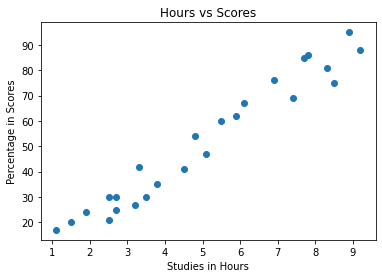

In [ ]:
## Plotting Graph Studies Hours vs Percentage in Scores
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Studies in Hours')
plt.ylabel('Percentage in Scores')
plt.title('Hours vs Scores')
plt.show()

**From the above graph it is observed that there exists a linear relationship between Hours and Scores**

## Perparing the data 


In [ ]:
## spliting the data into features and target
X = df['Hours']
y = df['Scores']

In [ ]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [ ]:
## spliting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 1), (3, 1), (22, 1), (3, 1))

## Training the model using linear Regression

In [ ]:
## Import the model from sklearn and make object of it
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

In [ ]:
## fit the model on training data
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the model on test data

In [ ]:
## Testing the model on testing data
y_predict=regressor.predict(X_test)
y_predict

array([[17.30220982],
       [34.05529402],
       [75.44526674]])

## Performance Matrix for Regressor Model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
print('R2 Score: {}'.format(r2_score(y_test,y_predict)))
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_predict)))

R2 Score: 0.9298077534821835
Mean Absolute Error: 5.3994503136120064


**The R Square score is near to 1**

**The Mean Absolute Error is lower i.e close to 0**

## Plotting Regressor line on Graph

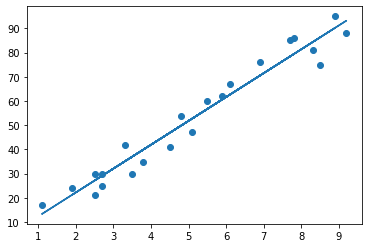

In [ ]:
## Plotting the regression line for training data
line = regressor.coef_ * X_train + regressor.intercept_

## Plotting for the training data
plt.scatter(X_train, y_train)
plt.plot(X_train, line)
plt.show()

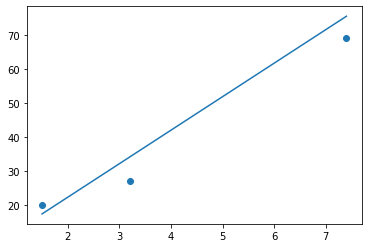

In [ ]:
## Plotting the regression line for testing data
line = regressor.coef_ * X_test + regressor.intercept_

## Plotting for the testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, line)
plt.show()

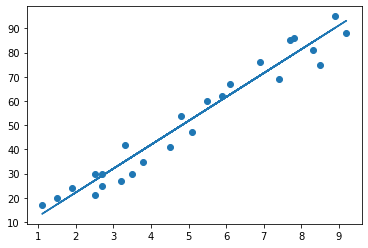

In [ ]:
## Plotting the regression line 
line = regressor.coef_ * X + regressor.intercept_

## Plotting graph X vs y
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

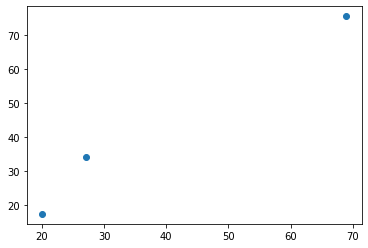

In [ ]:
## plotting y_test and y_predict
plt.scatter(y_test,y_predict)
plt.show()

In [ ]:
## Predicting the model on training dataset
X_train_predict = regressor.predict(X_train)

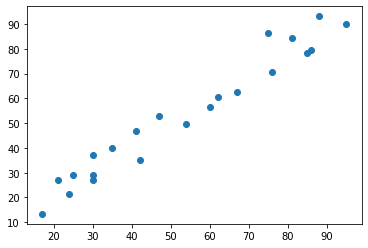

In [ ]:
## plotting y_train and X_train_predict
plt.scatter(y_train,X_train_predict)
plt.show()

**From above all plots there exist a linear relationship between X and y**

##**What will be the pridect score if the student studeis for 9.25 hrs / day ?**

In [ ]:
regressor.predict([[9.25]])

array([[93.67656425]])

**If the student studies for 9.25 hrs / day the pridected score is 93.677**